<a href="https://colab.research.google.com/github/Aishwarya-RaviK/Machine-Learning-Algo-Task7/blob/main/SVM_Assignment14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Social_Network_Ads.csv

**Import libraries**

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Importing the dataset**

In [ ]:
df=pd.read_csv("/content/Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
df.drop(['User ID'],axis=1,inplace=True)

In [ ]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [ ]:
df['Gender']=[0 if x=='Male' else 1 for x in df['Gender']]
df['Gender'].unique()

array([0, 1])

**Splitting the dataset into the Training set and Test set**

In [ ]:
X=df[['Gender','Age','EstimatedSalary']]
y=df['Purchased']

In [ ]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)

**Feature Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
X_train=scale.fit_transform(X_train)
X_test=scale.transform(X_test)

**Fitting SVM to the Training set**

In [ ]:
from sklearn import svm 
model=svm.SVC(kernel='linear',random_state=2)
model.fit(X_train,y_train)

SVC(kernel='linear', random_state=2)

**Predicting the Test set results**

In [ ]:
y_pred=model.predict(X_test)

**Making the Confusion Matrix**

In [ ]:
from sklearn.metrics import plot_roc_curve, roc_curve, roc_auc_score, confusion_matrix,f1_score 
confusion_matrix(y_test,y_pred)

array([[54,  5],
       [ 3, 18]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


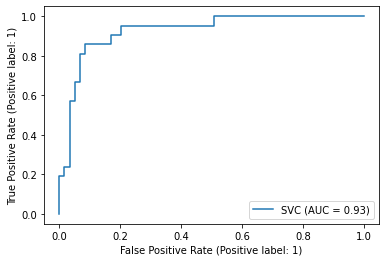

In [ ]:
f1_score(y_test,y_pred)
plot_roc_curve(model,X_test,y_test)

**Visualising the Training set results**

In [ ]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

ValueError: ignored

**Visualising the Test set results**

In [ ]:
#Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

ValueError: ignored